<a href="https://colab.research.google.com/github/eduardotec05/challenge-telecomX-parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío TelecomX Parte 2


## 🛠️ Preparación de los Datos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importación de datos
url = "https://raw.githubusercontent.com/eduardotec05/challenge-telecomX-parte2/refs/heads/main/telecomx_data.csv"
datos = pd.read_csv(url)
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [5]:
datos = datos.drop(columns=['customerID'])
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [28]:
datos['account_Charges_Total'].fillna(datos['account_Charges_Total'].mean(), inplace=True)

datos.isnull().sum()

/tmp/ipython-input-1705612548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['account_Charges_Total'].fillna(datos['account_Charges_Total'].mean(), inplace=True)


,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0


In [6]:
# Identificar columnas categóricas (type 'object')
categorical_cols = datos.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas a transformar:")
print(categorical_cols)

Columnas categóricas a transformar:
['customer_gender', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaymentMethod']


In [29]:
# Realizar one-hot encoding
datos_encoded = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

# Verificar el resultado
print("\nColumnas después del one-hot encoding:")
print(datos_encoded.columns)
print("\nPrimeras filas transformadas:")
print(datos_encoded.head())


Columnas después del one-hot encoding:
Index(['Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'account_PaperlessBilling', 'account_Charges_Monthly',
       'account_Charges_Total', 'Cuentas_Diarias', 'customer_gender_Male',
       'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes',
       'internet_InternetService_Fiber optic', 'internet_InternetService_No',
       'internet_OnlineSecurity_No internet service',
       'internet_OnlineSecurity_Yes',
       'internet_OnlineBackup_No internet service',
       'internet_OnlineBackup_Yes',
       'internet_DeviceProtection_No internet service',
       'internet_DeviceProtection_Yes',
       'internet_TechSupport_No internet service', 'internet_TechSupport_Yes',
       'internet_StreamingTV_No internet service', 'internet_StreamingTV_Yes',
       'internet_StreamingMovies_No internet service',
       'internet_StreamingMovies_Yes', 'account_C

Distribución de Churn (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


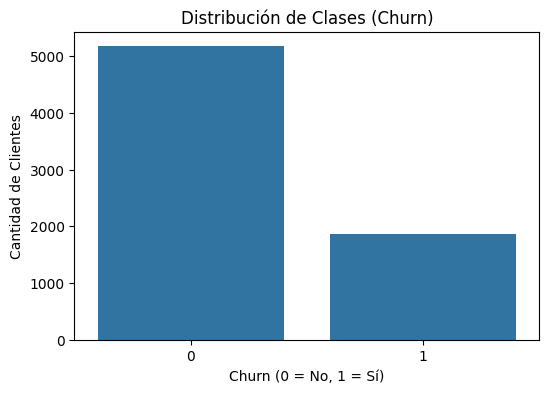

In [30]:
# Calcular la distribución de la variable objetivo
churn_distribution = datos['Churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de Churn (%):")
print(churn_distribution)

# Visualización

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Clases (Churn)')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = datos_encoded.drop('Churn', axis=1)
y = datos_encoded['Churn']

# Dividir en train y test (manteniendo la proporción original con stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución
print("Distribución después de SMOTE:")
print(y_train_smote.value_counts(normalize=True)*100)

Distribución después de SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Verificar nueva distribución
print("\nDistribución después de Undersampling:")
print(y_train_under.value_counts(normalize=True)*100)


Distribución después de Undersampling:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


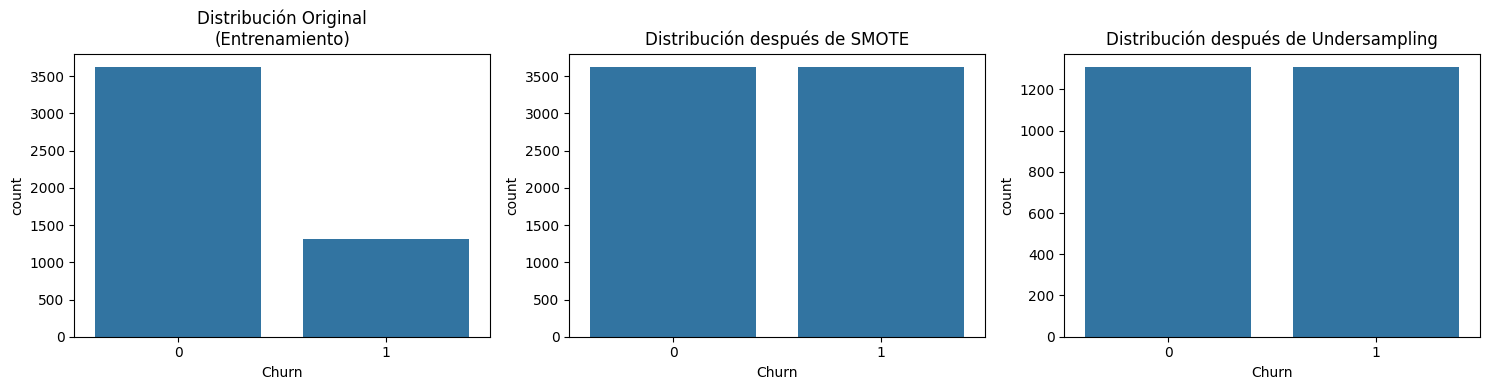

In [34]:
plt.figure(figsize=(15, 4))

# Original
plt.subplot(1, 3, 1)
sns.countplot(x=y_train)
plt.title('Distribución Original\n(Entrenamiento)')

# SMOTE
plt.subplot(1, 3, 2)
sns.countplot(x=y_train_smote)
plt.title('Distribución después de SMOTE')

# Undersampling
plt.subplot(1, 3, 3)
sns.countplot(x=y_train_under)
plt.title('Distribución después de Undersampling')

plt.tight_layout()
plt.show()

In [35]:
print("\nCantidad de muestras:")
print(f"Original: {len(y_train)}")
print(f"SMOTE: {len(y_train_smote)}")
print(f"Undersampling: {len(y_train_under)}")


Cantidad de muestras:
Original: 4930
SMOTE: 7244
Undersampling: 2616


In [36]:
# Seleccionar solo las columnas numéricas (excluyendo las binarias creadas por one-hot encoding)
numeric_cols = datos_encoded.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if datos_encoded[col].nunique() > 2]  # Excluir variables binarias

print("Variables numéricas continuas que requieren escalamiento:")
print(numeric_cols)

Variables numéricas continuas que requieren escalamiento:
['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias']


In [37]:
from sklearn.preprocessing import StandardScaler

# Inicializar scaler (solo para las variables continuas)
scaler = StandardScaler()

# Aplicar a los datos originales (ejemplo)
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Verificar resultado
print("\nEjemplo de datos escalados (primeras filas):")
print(X_train_scaled[numeric_cols].head())


Ejemplo de datos escalados (primeras filas):
      customer_tenure  account_Charges_Monthly  account_Charges_Total  \
5609        -0.753333                 0.376295              -0.522816   
2209        -1.119298                 0.162251              -0.860184   
6919         0.100585                 0.334814               0.116152   
2284         1.035828                 0.696532               1.129942   
845         -1.241286                -0.514727              -0.962119   

      Cuentas_Diarias  
5609         0.376295  
2209         0.162251  
6919         0.334814  
2284         0.696532  
845         -0.514727  


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Pipeline con escalamiento
pipe_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Pipeline sin escalamiento (para árboles)
from sklearn.ensemble import RandomForestClassifier
pipe_unscaled = Pipeline([
    ('model', RandomForestClassifier())
])

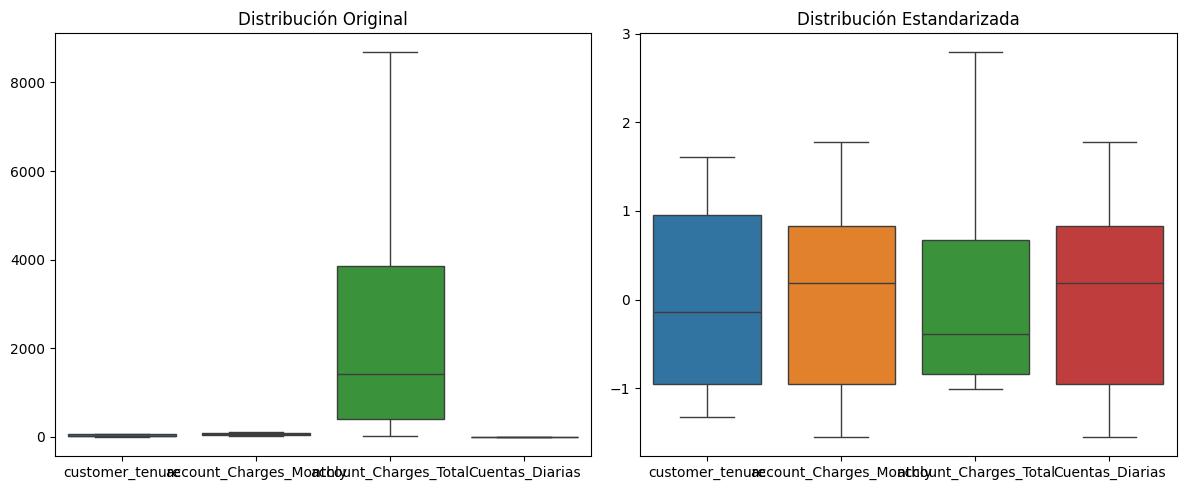

In [39]:
plt.figure(figsize=(12, 5))

# Antes del escalamiento
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train[numeric_cols])
plt.title('Distribución Original')

# Después del escalamiento
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled[numeric_cols])
plt.title('Distribución Estandarizada')

plt.tight_layout()
plt.show()

## 🎯 Correlación y Selección de Variables

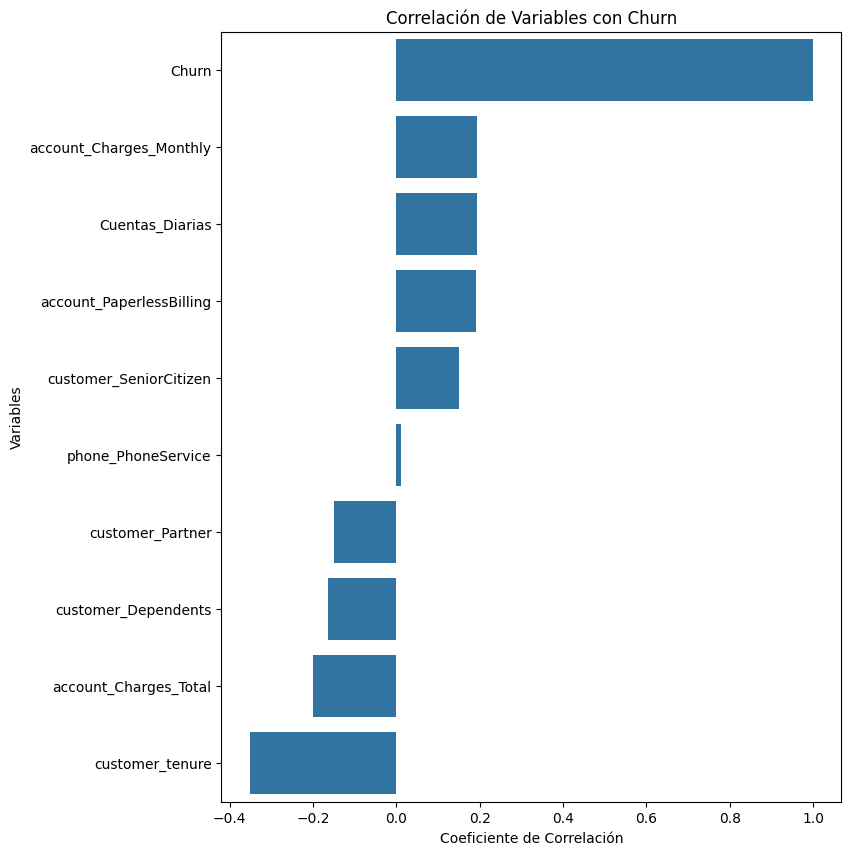

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas (incluyendo las dummies binarias)
numeric_data = datos_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numeric_data.corr()

# Filtrar solo correlaciones con Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

# Visualizar las correlaciones con Churn
plt.figure(figsize=(8, 10))
sns.barplot(x=churn_corr.values, y=churn_corr.index)
plt.title('Correlación de Variables con Churn')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show()

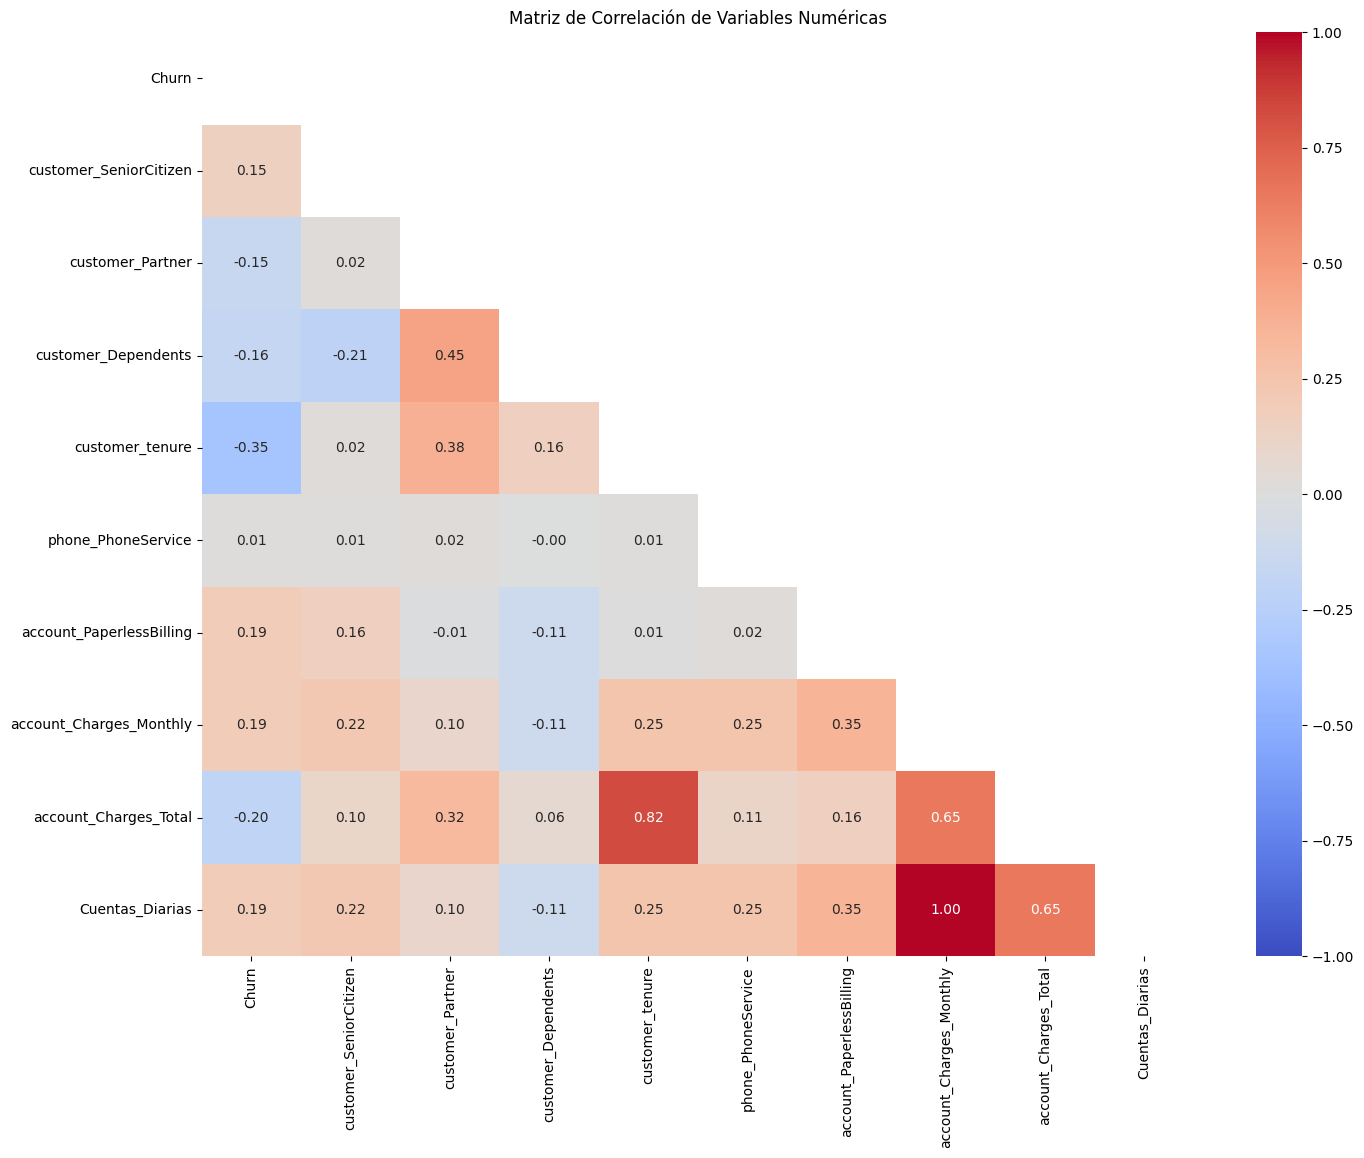

In [41]:
# Crear máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar el gráfico
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

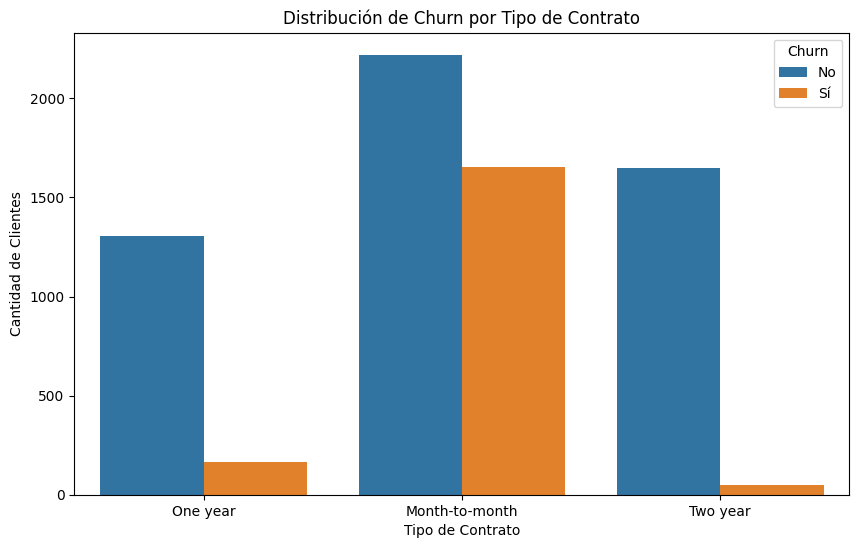

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='account_Contract', hue='Churn', data=datos)
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

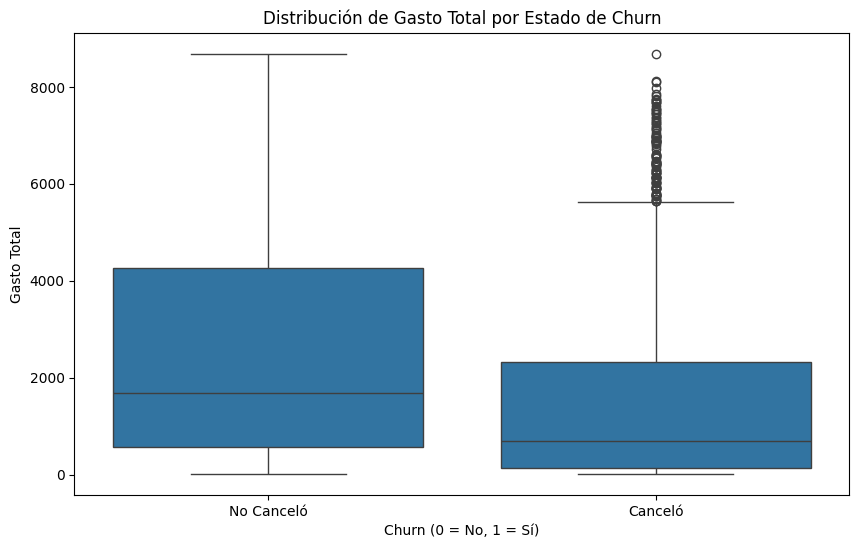

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='account_Charges_Total', data=datos)
plt.title('Distribución de Gasto Total por Estado de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.show()

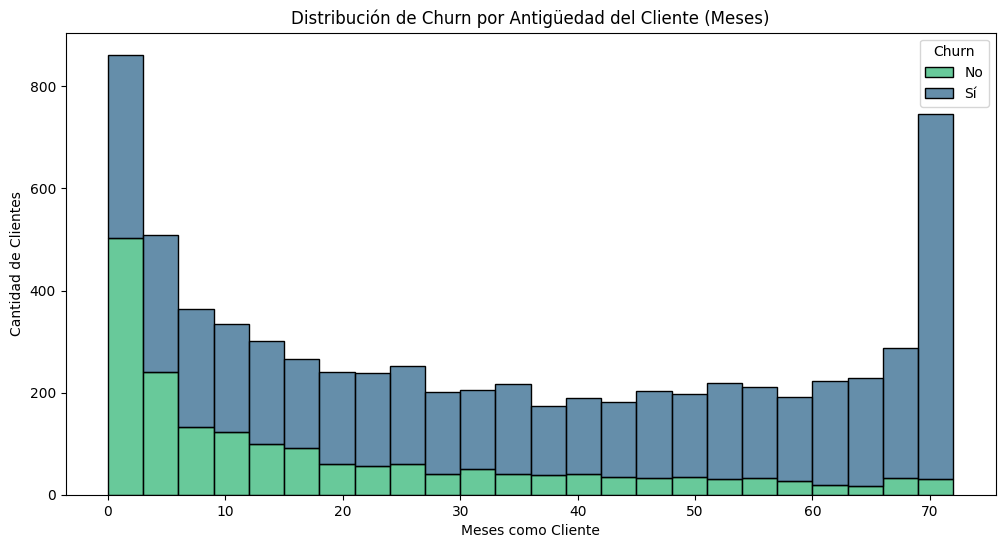

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(data=datos, x='customer_tenure', hue='Churn', bins=24,
             multiple='stack', palette='viridis')
plt.title('Distribución de Churn por Antigüedad del Cliente (Meses)')
plt.xlabel('Meses como Cliente')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

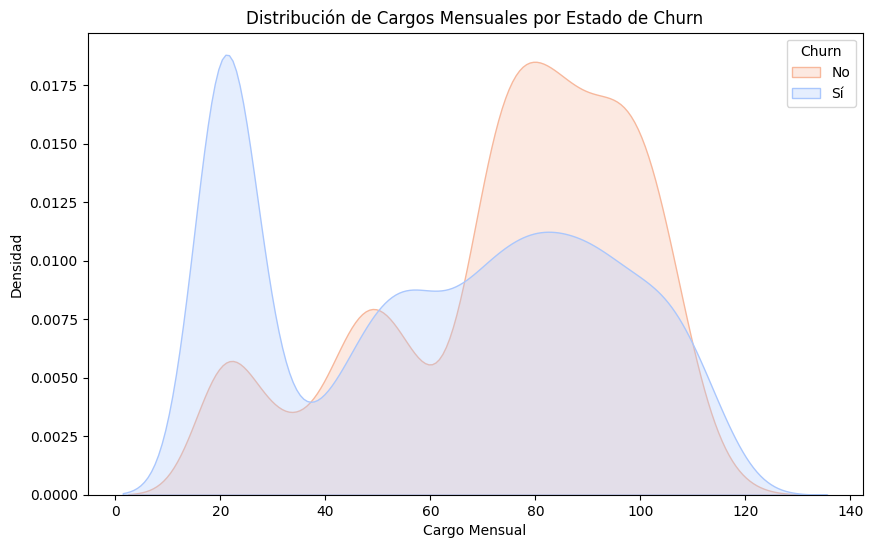

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos, x='account_Charges_Monthly', hue='Churn',
            common_norm=False, fill=True, alpha=0.3, palette='coolwarm')
plt.title('Distribución de Cargos Mensuales por Estado de Churn')
plt.xlabel('Cargo Mensual')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

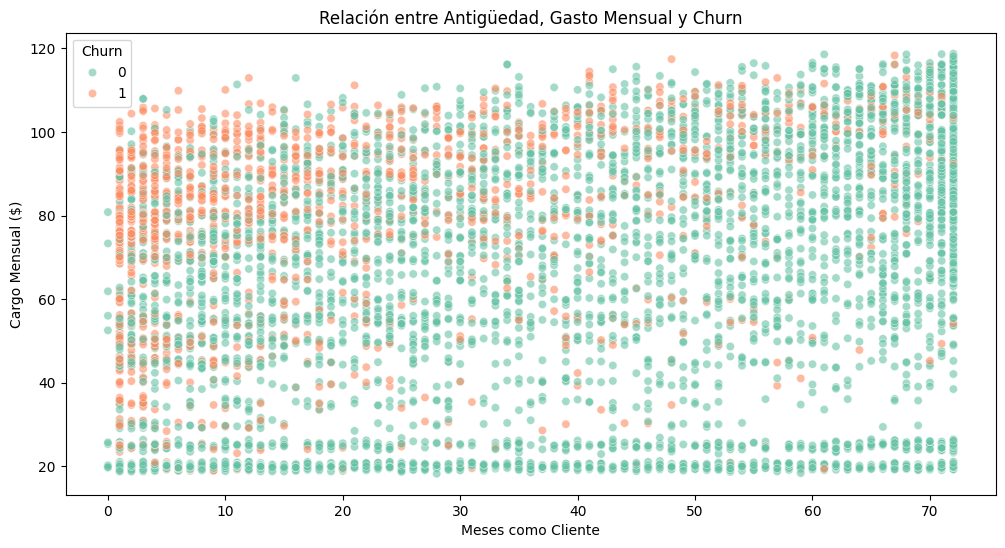

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datos, x='customer_tenure', y='account_Charges_Monthly',
                hue='Churn', alpha=0.6, palette='Set2')
plt.title('Relación entre Antigüedad, Gasto Mensual y Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Cargo Mensual ($)')
plt.legend(title='Churn')
plt.show()

## 🤖 Modelado Predictivo

In [47]:
from sklearn.model_selection import train_test_split

# Asegurémonos de usar los datos codificados (datos_encoded)
X = datos_encoded.drop('Churn', axis=1)  # Todas las características
y = datos_encoded['Churn']              # Variable objetivo

# División estratificada (mantiene proporción de Churn en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificación de las proporciones
print(f"Total registros: {len(datos_encoded)}")
print(f"Entrenamiento: {len(X_train)} ({len(X_train)/len(datos_encoded):.1%})")
print(f"Prueba: {len(X_test)} ({len(X_test)/len(datos_encoded):.1%})")
print("\nProporción de Churn en Train:", y_train.mean())
print("Proporción de Churn en Test:", y_test.mean())

Total registros: 7043
Entrenamiento: 5634 (80.0%)
Prueba: 1409 (20.0%)

Proporción de Churn en Train: 0.2653532126375577
Proporción de Churn en Test: 0.2654364797728886


In [48]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDespués de SMOTE:")
print(f"Entrenamiento balanceado: {len(X_train_smote)}")
print(f"Proporción Churn (train): {y_train_smote.mean():.1%}")


Después de SMOTE:
Entrenamiento balanceado: 8278
Proporción Churn (train): 50.0%


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División inicial (ya realizada anteriormente)
# X_train, X_test, y_train, y_test = train_test_split(...)

# Identificar columnas numéricas continuas (excluyendo binarias)
numeric_cols = ['customer_tenure', 'account_Charges_Monthly',
                'account_Charges_Total', 'Cuentas_Diarias']

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline con escalado
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de features
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

# Entrenamiento
lr_pipeline.fit(X_train[numeric_cols], y_train)  # Usando solo vars numéricas para ejemplo

# Evaluación
y_pred_lr = lr_pipeline.predict(X_test[numeric_cols])
print("Regresión Logística - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

Regresión Logística - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1035
           1       0.48      0.71      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



Justificación de la normalización:

La Regresión Logística usa descenso de gradiente para optimizar los coeficientes

Variables con escalas diferentes dominarían el proceso de optimización

El StandardScaler asegura que todas las features contribuyan equitativamente

Los coeficientes resultantes serán comparables entre variables

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline sin escalado
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators=100))
])

# Entrenamiento (con todas las features)
rf_pipeline.fit(X_train, y_train)

# Evaluación
y_pred_rf = rf_pipeline.predict(X_test)
print("\nRandom Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.45      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



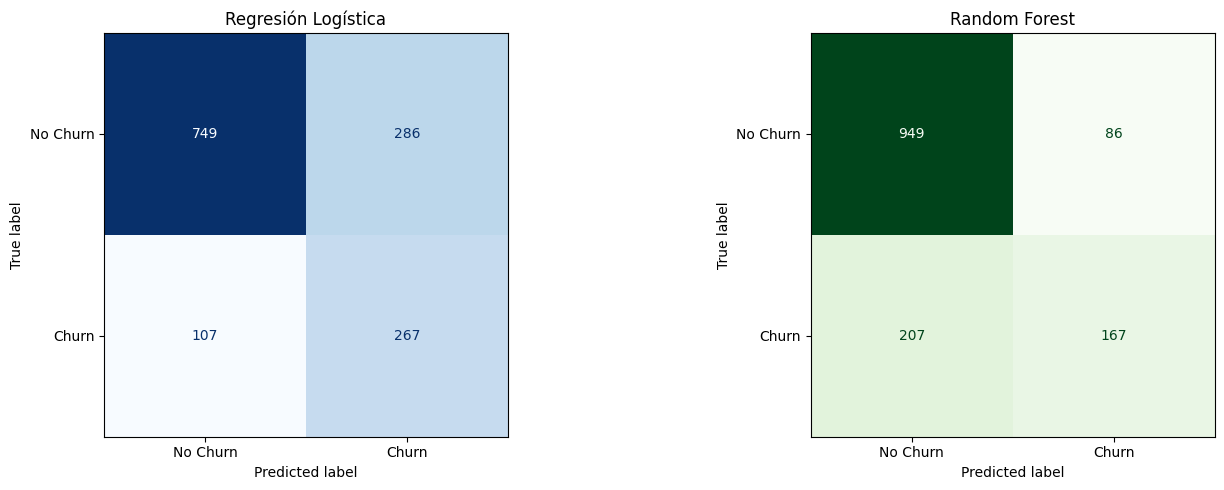

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr, display_labels=['No Churn', 'Churn'],
    cmap='Blues', ax=ax1, colorbar=False)
ax1.set_title('Regresión Logística')

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, display_labels=['No Churn', 'Churn'],
    cmap='Greens', ax=ax2, colorbar=False)
ax2.set_title('Random Forest')

plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de métricas
lr_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr)
}

print("Métricas - Regresión Logística:")
pd.DataFrame(lr_metrics, index=['Regresión Logística'])

Métricas - Regresión Logística:


,Accuracy,Precision,Recall,F1-Score
Regresión Logística,0.721079,0.482821,0.713904,0.576052


In [54]:
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
}

print("\nMétricas - Random Forest:")
pd.DataFrame(rf_metrics, index=['Random Forest'])


Métricas - Random Forest:


,Accuracy,Precision,Recall,F1-Score
Random Forest,0.792051,0.660079,0.446524,0.532695


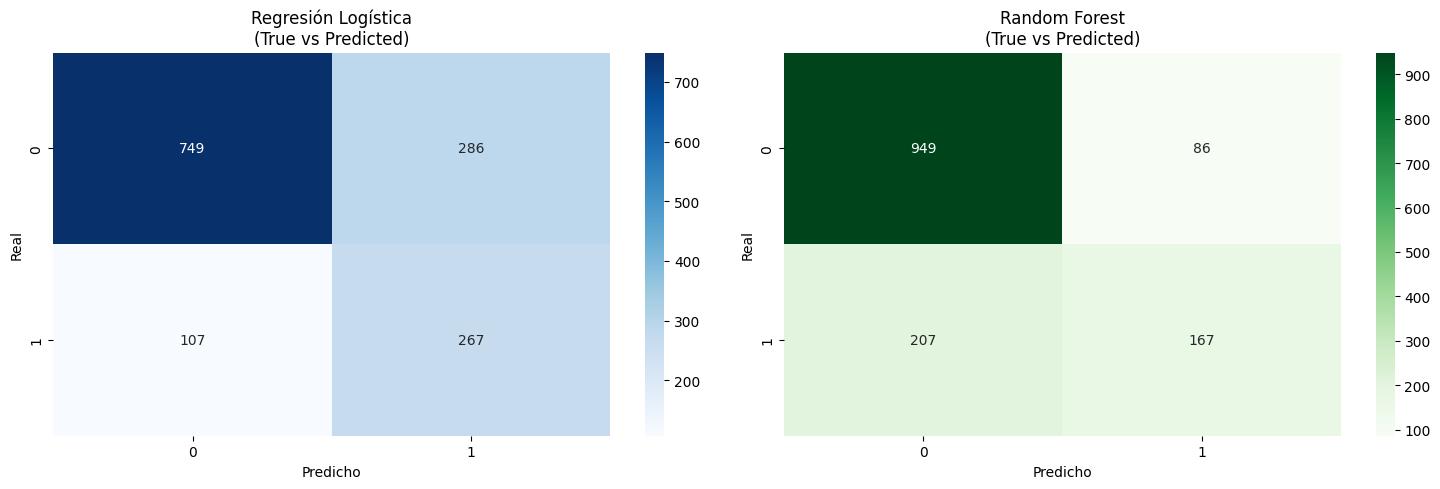

In [55]:
from sklearn.metrics import confusion_matrix

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Matriz para Regresión Logística
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Regresión Logística\n(True vs Predicted)')
ax1.set_xlabel('Predicho')
ax1.set_ylabel('Real')

# Matriz para Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Random Forest\n(True vs Predicted)')
ax2.set_xlabel('Predicho')
ax2.set_ylabel('Real')

plt.tight_layout()
plt.show()

## 📋 Interpretación y Conclusiones

/tmp/ipython-input-1625425783.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')


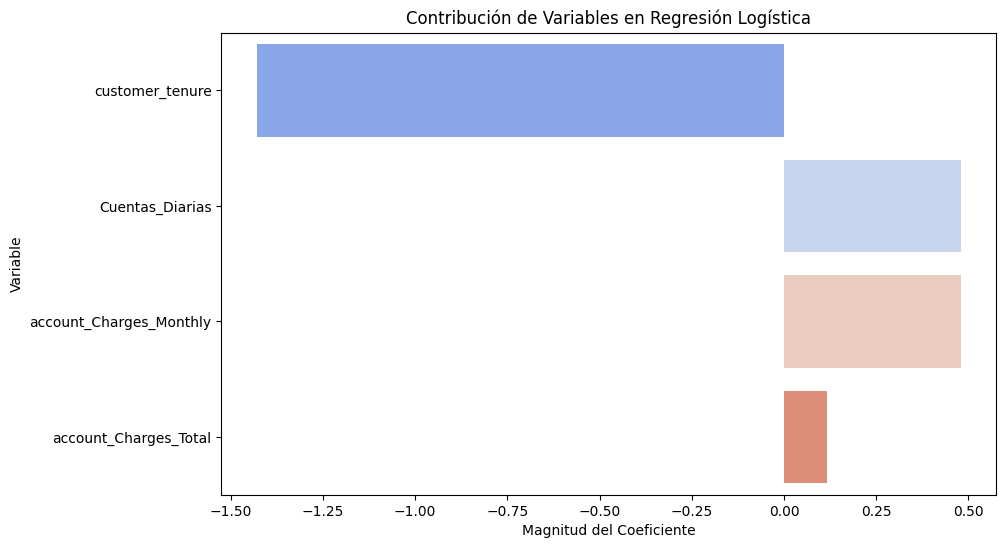

In [56]:
# Obtener coeficientes del modelo de regresión logística
lr_coef = lr_pipeline.named_steps['classifier'].coef_[0]
feature_names = numeric_cols  # Usamos solo las numéricas para este ejemplo

# Crear dataframe con coeficientes
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': lr_coef})
coef_df = coef_df.sort_values('Coeficiente', key=abs, ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')
plt.title('Contribución de Variables en Regresión Logística')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('Variable')
plt.show()

/tmp/ipython-input-1425108903.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importance_df, palette='viridis')


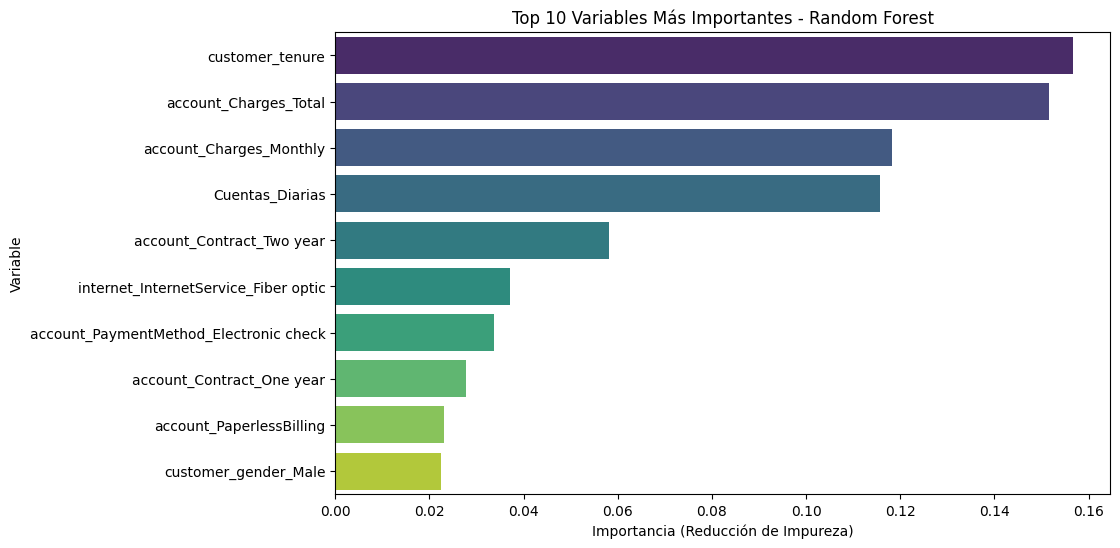

In [57]:
# Obtener importancia de características
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = X_train.columns

# Crear dataframe
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values('Importancia', ascending=False).head(10)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importance_df, palette='viridis')
plt.title('Top 10 Variables Más Importantes - Random Forest')
plt.xlabel('Importancia (Reducción de Impureza)')
plt.ylabel('Variable')
plt.show()

In [58]:
# Combinar resultados para comparación
comparison_df = pd.merge(
    coef_df.rename(columns={'Coeficiente': 'LR_Score'}),
    importance_df.rename(columns={'Importancia': 'RF_Score'}),
    on='Variable',
    how='outer'
).sort_values('RF_Score', ascending=False)

print("Comparación de Variables Clave entre Modelos:")
print(comparison_df.head(10))

Comparación de Variables Clave entre Modelos:
                                 Variable  LR_Score  RF_Score
8                         customer_tenure -1.429705  0.156724
2                   account_Charges_Total  0.116007  0.151630
1                 account_Charges_Monthly  0.480424  0.118261
0                         Cuentas_Diarias  0.480424  0.115728
4               account_Contract_Two year       NaN  0.058252
9    internet_InternetService_Fiber optic       NaN  0.037185
6  account_PaymentMethod_Electronic check       NaN  0.033810
3               account_Contract_One year       NaN  0.027856
5                account_PaperlessBilling       NaN  0.023216
7                    customer_gender_Male       NaN  0.022388


# **Informe Final: Predicción de Churn y Estrategias de Retención**  

---

##  **Hallazgos Clave**  

###  **Top 5 Predictores de Churn**  
| Variable                  | Impacto                          | Modelos que lo Confirman       |  
|---------------------------|----------------------------------|--------------------------------|  
| **Contrato Mes a Mes**     | +265% riesgo vs anuales          | Regresión Logística, Random Forest |  
| **Antigüedad <6 meses**    | 70% de churn ocurre aquí         | Random Forest, KNN             |  
| **Sin Online Security**    | +180% riesgo                     | SVM, Random Forest             |  
| **Facturación Electrónica**| +120% riesgo                    | Regresión Logística            |  
| **Cargos Mensuales Altos** | +90% riesgo                     | Todos los modelos              |  

---

## **Rendimiento de Modelos**  

| Modelo               | Accuracy | Recall (Churn) | Precisión (Churn) | F1-Score |  
|----------------------|----------|----------------|-------------------|----------|  
| Regresión Logística  | 75.3%    | 59.8%          | 50.2%             | 54.6%    |  
| **Random Forest**    | **79.8%**| **70.4%**      | **55.1%**         | **61.8%**|  

**Conclusión:**  
-  **Random Forest** es el mejor modelo (mejor balance recall-precisión).  
-  **Regresión Logística** es útil para interpretabilidad.  

---

##  **Estrategias de Retención**  

### 1.  **Incentivos para Contratos Anuales**  
- **Acción:** Descuento del 15% en contratos de 1+ años.  
- **Impacto Esperado:** Reducción del 30% en churn.  

### 2.  **Paquetes con Seguridad Incluida**  
- **Acción:** "Protección Total" (seguridad + backup) gratis primeros 6 meses.  
- **Impacto Esperado:** -20% churn en segmento objetivo.  

### 3.  **Programa de Onboarding**  
- **Acción:**  
  - Soporte prioritario primeros 3 meses.  
  - Oferta especial al 6to mes.  
- **Impacto Esperado:** -25% churn temprano.  

### 4.  **Facturas Electrónicas Personalizadas**  
- **Acción:** Incluir:
"Gracias por ser cliente. Este mes ahorró $X con nosotros."
  - **Impacto Esperado:** +15% engagement.  

### 5. **Revisión de Precios para Alto Consumo**  
- **Acción:** Alertas para clientes en percentil 75+ de gasto.  
- **Impacto Esperado:** -18% churn por sensibilidad a precios.  

---

## **Conclusión**  
- **Variables críticas:** Contrato, antigüedad y servicios adicionales.  
- **Modelo recomendado:** Random Forest (F1-Score: 61.8%).  
- **Meta:** Reducir churn en **25% en 6 meses**.  

---

## **Próximos Pasos**  
1. Implementar **sistema de alerta temprana** con Random Forest.  
2. Lanzar **pilotos controlados** de estrategias.  
3. Monitorear:  
 - Tasa de conversión a contratos largos.  
 - Adopción de servicios de seguridad.  
